<a href="https://colab.research.google.com/github/hesolar/TrabajoDistribuidos2020solar-escudero/blob/master/practica9_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 9 Parte 2: Análisis de sentimientos

El análisis de sentimientos es un problema de procesado de lenguaje natural donde se pretende conocer la intención de un texto. En esta práctica vamos a ver cómo predecir el sentimiento, positivo o negativo, de una valoracion de una película.

En esta ocasión vamos a utilizar la librería de deep learning [Keras](https://keras.io/).


En esta práctica es importante que actives el uso de GPU. Para ello ve al menú Edit -> Notebook settings y en la opción Hardware accelerator selecciona la opción de GPU.


## Dataset

El dataset usado en esta sesión es el dataset [IMDB](http://ai.stanford.edu/~amaas/data/sentiment/). Dicho dataset contiene 25000 valoraciones (positivas y negativas) para entrenar, y 25000 valoraciones  para testear. El objetivo es ser capaz de determinar si una valoración de una película es positiva o negativa. 

Keras proporciona acceso directo al dataset IMDB en un formato listo para ser usado por las redes neuronales, lo que evita tener que descargarlo y procesarlo. La función ``imdb.load_data()`` permite cargar el dataset donde las palabras han sido reemplazadas por enteros que indican la popularidad (número de apariciones)  de una palabra en el dataset. 

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import imdb
from matplotlib import pyplot as plt
%matplotlib inline

(X_train,y_train), (X_test,y_test) = imdb.load_data()

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

A continuación mostramos la forma del dataset

In [ ]:
print("Datos entrenamiento: ")
print(X_train.shape)
print(y_train.shape)

print("Datos test: ")
print(X_test.shape)
print(y_test.shape)

Datos entrenamiento: 
(25000,)
(25000,)
Datos test: 
(25000,)
(25000,)


Podemos también mostrar que aspecto tienen los elementos de nuestro dataset. 

In [ ]:
X_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

A partir de la instrucción anterior podemos ver que los elementos de nuestro dataset se representan mediante una lista de enteros, donde cada entero está asociado a una palabra. Para restaurar el mensaje original podemos ejecutar el siguiente comando.

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
' '.join([reverse_word_index.get(i - 3, '?') for i in X_train[0]])

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should b

Podemos también mostrar el número de clases (veremos que nos devuelve dos clases, el 0 representa una valoración negativa y el 1 una valoración positiva)

In [ ]:
print("Clases: ")
print(np.unique(y_train))

Clases: 
[0 1]


También podemos ver el número total de palabras del dataset. 

In [ ]:
print("Número de palabras: ")
print(len(np.unique(np.hstack(X_train))))

Número de palabras: 
88585


Finalmente, podemos ver la longitud media de las valoraciones. 

Longitud media: 
Media 238.71 palabras (176.493674)


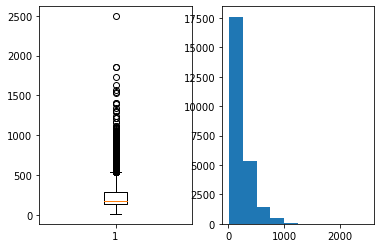

In [ ]:
print("Longitud media: ")
result = [len(x) for x in X_train]
print("Media %.2f palabras (%f)" % (np.mean(result),np.std(result)))
plt.subplot(121)
plt.boxplot(result)
plt.subplot(122)
plt.hist(result)
plt.show()

##### Ejercicio
A partir de los diagramas anteriores, ¿qué puedes decir del tamaño de las valoraciones? ¿Cuál sería el tamaño de la valoración más larga (para esta pregunta puedes ejecutar alguna instrucción adicional)?

La mayoría de valoraciones están concentradas aproximadamente entre los intervalos 0-500 , la media está próxima a 200.

In [ ]:
result = [len(x) for x in X_train]
print("Máximo de palabras (%f)" % (max(result)))
print("Media %.2f palabras (%f)" % (np.mean(result),np.std(result)))
print("Min de palabras (%f)" % (min(result)))


Máximo de palabras (2494.000000)
Media 238.71 palabras (176.493674)
Min de palabras (11.000000)


## Word embeddings

Como ya hemos visto, uno de los grandes avances más recientes en el área del procesamiento de lenguaje natural son los *word embeddings*. Los *word embeddings* son una técnica donde las palabras se codifican como vectores de reales en un espacio de dimensión alta, donde las similaridad entre palabras se traduce en cercanía de los vectores. Esto s muy útil ya que al trabajar con redes neuronales se requiere una conversión de las palabras a números. 

Por el momento no vamos a usar ningún word embedding de los vistos con anterioridad, sino que vamos aprenderlos directamente a partir de nuestros datos. Keras proporciona una manera sencilla de convertir representaciones de palabras mediante enteros positios a un word embedding mediante una capa de ``Embedding``. Esta capa toma argumentos que definen la asociación de palabras a vectores. Estos argumentos incluyen el número máximo de palabras esperadas, también conocido como el tamaño del vocabulario. Esta capa también permite especificar la dimensionalidad de la representación.

Queremos usar una representación para nuestro dataset. Digamos que estamos interesados en las 5000 palabras más usadas del dataset. Por lo tanto, nuestro vocabulario tendrá 5000 elementos. También podemos elegir usar un vector de dimensión 32 para representar cada una de las palabras. Finalmente, podemos fijar que la longitud máxima de las valoraciones sea de 500 palabras, truncando aquellas que son más largas y añadiendo ceros a las que son más cortas. Vamos a obtener de nuevo nuestro dataset teniendo esto en cuenta. También vamos a definir un conjunto de validación usando el 20% del conjunto de entrenamiento. 

In [ ]:
from sklearn.model_selection import train_test_split
(X_train,y_train), (X_test,y_test) = imdb.load_data(num_words=5000)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                    test_size=0.2,
                                                    random_state=15)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

Podemos ahora truncar o completar cada una de las valoraciones para que contenga 500 palabras.

In [ ]:
from keras.preprocessing import sequence
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_val = sequence.pad_sequences(X_val, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

## Modelo Red Neuronal Simple

Vamos a construir varios modelos para nuestro dataset. Comenzaremos con una red neuronal multicapa con una única capa oculta. La innovación será la capa de word embedding que muestra cómo se pueden conseguir buenos resultados con un modelo tan simple. 

Comenzamos importando las funciones necesarias e inicializando una semilla para obtener resultados consistentes. 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

seed = 15
np.random.seed(seed)

A continuación creamos nuestro modelo.

In [ ]:
top_words = 5000
def create_model():
  model = Sequential()
  model.add(Embedding(top_words,32,input_length=max_words))
  model.add(Flatten())
  model.add(Dense(250,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  print(model.summary())
  return model

model1 = create_model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 16000)             0         
_________________________________________________________________
dense (Dense)                (None, 250)               4000250   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None


Vamos ahora a entrenar el modelo y a mostrar su curva de entrenamiento y validación. 

In [ ]:
history = model1.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=10,batch_size=128,verbose=1)

Epoch 1/10
157/157 [==============================] - 17s 103ms/step - loss: 0.6197 - accuracy: 0.6243 - val_loss: 0.3383 - val_accuracy: 0.8508
Epoch 2/10
157/157 [==============================] - 16s 101ms/step - loss: 0.1783 - accuracy: 0.9338 - val_loss: 0.3083 - val_accuracy: 0.8750
Epoch 3/10
157/157 [==============================] - 16s 101ms/step - loss: 0.0524 - accuracy: 0.9884 - val_loss: 0.4021 - val_accuracy: 0.8652
Epoch 4/10
157/157 [==============================] - 16s 102ms/step - loss: 0.0110 - accuracy: 0.9992 - val_loss: 0.4725 - val_accuracy: 0.8680
Epoch 5/10
157/157 [==============================] - 16s 102ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.5352 - val_accuracy: 0.8672
Epoch 6/10
157/157 [==============================] - 16s 101ms/step - loss: 8.8725e-04 - accuracy: 1.0000 - val_loss: 0.5619 - val_accuracy: 0.8672
Epoch 7/10
157/157 [==============================] - 16s 100ms/step - loss: 4.7260e-04 - accuracy: 1.0000 - val_loss: 0.5873 

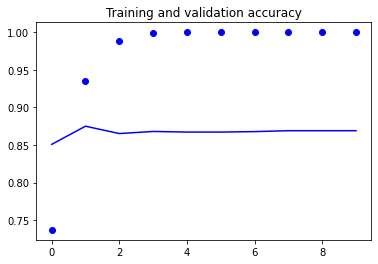

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))
plt.plot(epochs, acc, 'bo')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')

plt.show()

##### Ejercicio
A partir de las gráficas anteriores ¿qué problema tiene nuestro modelo?

Que no se ajusta a los datos de entrenamiento

Respuesta: 

Para evitar el problema anterior, vamos a entrenar de nuevo nuestra red, pero sólo 2 épocas. 

In [ ]:
model2 = create_model()
model2.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=2,batch_size=128,verbose=1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/2
157/157 [==============================] - 16s 102ms/step - loss: 0.6475 - accuracy: 0.5823 - val_loss: 0.3040 - val_accuracy: 0.8714
Epoch 2/2
157/157 [==============================] - 16s 100ms/step - loss: 0.1930 - accuracy

Por último, evaluamos nuestro modelo en el conjunto de test. 

In [ ]:
scores = model2.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 86.88%


Podemos también evaluar el modelo que tenía el problema y podemos ver que la accuracy es peor que la que hemos obtenido con el otro modelo, a pesar de haberlo entrenado por menos tiempo. 

In [ ]:
scores = model1.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 86.48%


## Red neuronal convolucional de una dimensión

Las redes neuronales convolucionales fueron creadas para tener en cuenta la estructura espacial de los datos en imágenes siendo robustas a cambios en la posición y orientación de los objetos. Este mismo principio se puede aplicar a secuencias como son las secuencias 1-dimensionales de palabras de una valoración de película.  Vamos a utilizar dicha propiedad en nuestro problema. 

Comenzamos cargando las librerías necesarias para trabajar con redes convolucionales 1-dimensionales. 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding

Definimos el modelo.

In [ ]:
def create_cnn_model():
  model = Sequential()
  model.add(Embedding(top_words,32,input_length=max_words))
  model.add(Convolution1D(filters=32,kernel_size=3,padding='same',activation='relu'))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Flatten())
  model.add(Dense(250,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  print(model.summary())
  return model

model3 = create_cnn_model()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 250, 32)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
____________________________________________

Entrenamos este nuevo modelo. 

In [ ]:
model3.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=2,batch_size=128,verbose=1)

Epoch 1/2
157/157 [==============================] - 18s 112ms/step - loss: 0.6384 - accuracy: 0.5884 - val_loss: 0.2823 - val_accuracy: 0.8906
Epoch 2/2
157/157 [==============================] - 17s 110ms/step - loss: 0.2273 - accuracy: 0.9102 - val_loss: 0.2640 - val_accuracy: 0.8926


Y evaluamos su precisión. 

In [ ]:
scores = model3.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 88.32%


Como podemos ver, este modelo mejora los resultados obtenidos con el modelo anterior. 

## LSTM

Vamos a crear ahora una pequeña red LSTM. Como en casos anteriores comenzamos cargando las librerías necesarias. 

In [ ]:
from keras.layers import LSTM

Definimos el modelo. 

In [ ]:
def create_lstm_model():
  model = Sequential()
  model.add(Embedding(top_words,32,input_length=max_words))
  model.add(LSTM(100))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  print(model.summary())
  return model

model4 = create_lstm_model()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               53200     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


Entrenamos el modelo. 

In [ ]:
model4.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=2,batch_size=128,verbose=1)

Epoch 1/2
157/157 [==============================] - 160s 1s/step - loss: 0.6531 - accuracy: 0.5935 - val_loss: 0.4141 - val_accuracy: 0.8170
Epoch 2/2
157/157 [==============================] - 157s 1s/step - loss: 0.3209 - accuracy: 0.8669 - val_loss: 0.3222 - val_accuracy: 0.8672


Y por último lo evaluamos contra el conjunto de test. 

In [ ]:
scores = model4.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 86.74%


## LSTM con Dropout

Uno de los problemas que tienen todas las redes que hemos definido hasta ahora es que tienden a sobreajustarse muy rápido. Para evitar dicho problema se puede utilizar la técnica de Dropout. 

Para ello definimos el siguiente modelo. 


In [ ]:
from keras.layers import Dropout

In [ ]:
def create_lstm_dropout_model():
  model = Sequential()
  model.add(Embedding(top_words,32,input_length=max_words))
  model.add(Dropout(0.2))
  model.add(LSTM(100,dropout=0.2,recurrent_dropout=0.2))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  print(model.summary())
  return model

model5 = create_lstm_dropout_model()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
dropout (Dropout)            (None, 500, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


##### Ejercicio

¿Por cuántas épocas puedes entrenar el nuevo modelo hasta que aparece el sobreajuste?

1 épocas

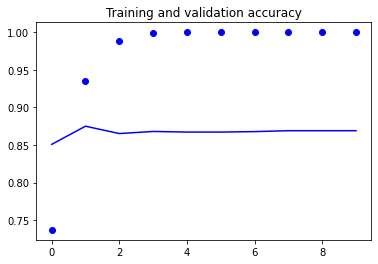

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))
plt.plot(epochs, acc, 'bo')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')

plt.show()

In [ ]:
history = model5.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=10,batch_size=128,verbose=1)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))
plt.plot(epochs, acc, 'bo')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')

plt.show()

Epoch 1/10
  9/157 [>.............................] - ETA: 3:46 - loss: 0.6473 - accuracy: 0.7240

KeyboardInterrupt: ignored

La he parado porque consume demasiado tiempos

##### Ejercicio
¿Qué accuracy consigues obtener con este nuevo modelo?

0.88

## Predicciones propias

Una vez construido nuestro modelo nos interesa probarlo con nuestras propias valoraciones. Para ello debemos convertir la frase a un formato que pueda alimentar a la red como se muestra a continuación. 

In [ ]:
review = "i generally love this type of movie however this time i found myself wanting to kick the screen since i can't do that i will just complain about it this was absolutely awful"
review = review.split(" ")
review = [word_index[w] for w in review]
review = sequence.pad_sequences([review], maxlen=max_words)

Y hacer la predicción con uno de nuestros modelos. 

In [ ]:
a=model4.predict(review)
if a<=0.5:
  print('negative review')
if a>0.5:
   print('positive review')

negative review


## Ejercicio obligatorio

El problema que hemos visto es un problema de clasificación binaria, existe otro dataset, [Reuters](https://keras.io/api/datasets/reuters/), para la clasificación multiclase (dicho dataset está disponible en [Keras](https://keras.io/datasets/#reuters-newswire-topics-classification)). El ejercicio consite en entrenar un modelo (utilizando las mismas ideas presentadas en este notebook) para dicho problema. Ten en cuenta que con dicho dataset no podrás utilizar como función de pérdida ``binary_crossentropy`` (preparada para problemas binarios) sino que deberás usar la función de pérdida ``categorical_crossentropy``. Añade a continuación todas las celdas que necesites. 

In [ ]:
#descargo librerias
!pip install -q keras   
import keras
#preparo el dataset , tomo 1500 palabras para hacerlo rápido
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    path="reuters.npz",
    num_words=1500,
    skip_top=0,
    maxlen=None,
    test_split=0.2,
    seed=113,
    start_char=1,
    oov_char=2,
    index_from=3
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


Los datos son un conjunto de enteros que representan palabras


In [ ]:
train_data[5]

[1,
 4,
 37,
 38,
 309,
 213,
 349,
 2,
 48,
 193,
 229,
 463,
 28,
 156,
 635,
 11,
 82,
 14,
 156,
 635,
 11,
 82,
 54,
 139,
 16,
 349,
 105,
 462,
 311,
 28,
 296,
 147,
 11,
 82,
 14,
 296,
 147,
 11,
 54,
 139,
 342,
 48,
 193,
 2,
 361,
 122,
 23,
 1332,
 28,
 318,
 942,
 11,
 82,
 14,
 318,
 942,
 11,
 82,
 54,
 139,
 122,
 7,
 105,
 462,
 23,
 349,
 28,
 296,
 767,
 11,
 82,
 14,
 296,
 767,
 11,
 54,
 139,
 342,
 229,
 162,
 7,
 48,
 193,
 55,
 408,
 28,
 258,
 557,
 11,
 82,
 14,
 196,
 557,
 11,
 82,
 54,
 139,
 162,
 7,
 105,
 462,
 55,
 349,
 28,
 191,
 968,
 11,
 82,
 14,
 191,
 785,
 11,
 54,
 139,
 17,
 12]

In [ ]:
#Aquí se puede apreciar como obtener ls palabras desde los enteros
word_index = reuters.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of ? co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and ? operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [ ]:
import numpy as np
#obtenemos las posiciones de las palabras
def vectorize_sequences(sequences, dimension=1500):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
# Training data
x_train = vectorize_sequences(train_data)
# Test data
x_test = vectorize_sequences(test_data)

In [ ]:
#mismo proceso para los datos de test
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
# Vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [ ]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
from keras import models
from keras import layers
#utilizamos un modelo simple de red
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(1500,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Vamos a validar los datos contra el modelo
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/50
63/63 [==============================] - 1s 9ms/step - loss: 2.5867 - accuracy: 0.4543 - val_loss: 1.3552 - val_accuracy: 0.7010
Epoch 2/50
63/63 [==============================] - 0s 6ms/step - loss: 1.2300 - accuracy: 0.7326 - val_loss: 1.1328 - val_accuracy: 0.7430
Epoch 3/50
63/63 [==============================] - 0s 5ms/step - loss: 0.9495 - accuracy: 0.7894 - val_loss: 0.9956 - val_accuracy: 0.7700
Epoch 4/50
63/63 [==============================] - 0s 6ms/step - loss: 0.7422 - accuracy: 0.8287 - val_loss: 0.9086 - val_accuracy: 0.7980
Epoch 5/50
63/63 [==============================] - 0s 6ms/step - loss: 0.6159 - accuracy: 0.8613 - val_loss: 0.8700 - val_accuracy: 0.7950
Epoch 6/50
63/63 [==============================] - 0s 6ms/step - loss: 0.5095 - accuracy: 0.8884 - val_loss: 0.8889 - val_accuracy: 0.7890
Epoch 7/50
63/63 [==============================] - 0s 5ms/step - loss: 0.4219 - accuracy: 0.9057 - val_loss: 0.8490 - val_accuracy: 0.8070
Epoch 8/50
63/63 [==

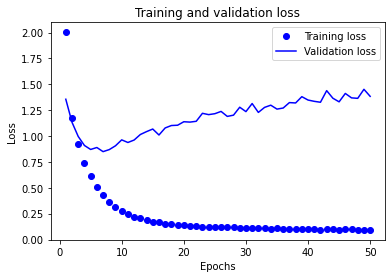

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Generamos predicciones

In [ ]:
predictions = model.predict(x_test)
y_train = np.array(train_labels)
y_test = np.array(test_labels)
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])


In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(1500,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(partial_x_train,
          partial_y_train,
          epochs=50,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/50
63/63 [==============================] - 1s 8ms/step - loss: 3.4364 - accuracy: 0.0692 - val_loss: 2.3966 - val_accuracy: 0.6100
Epoch 2/50
63/63 [==============================] - 0s 6ms/step - loss: 2.1129 - accuracy: 0.5992 - val_loss: 1.6472 - val_accuracy: 0.6130
Epoch 3/50
63/63 [==============================] - 0s 5ms/step - loss: 1.5036 - accuracy: 0.6345 - val_loss: 1.4775 - val_accuracy: 0.6260
Epoch 4/50
63/63 [==============================] - 0s 5ms/step - loss: 1.3816 - accuracy: 0.6376 - val_loss: 1.4249 - val_accuracy: 0.6500
Epoch 5/50
63/63 [==============================] - 0s 5ms/step - loss: 1.2167 - accuracy: 0.7090 - val_loss: 1.3571 - val_accuracy: 0.6990
Epoch 6/50
63/63 [==============================] - 0s 5ms/step - loss: 1.1375 - accuracy: 0.7309 - val_loss: 1.3170 - val_accuracy: 0.7100
Epoch 7/50
63/63 [==============================] - 0s 6ms/step - loss: 1.0511 - accuracy: 0.7465 - val_loss: 1.3070 - val_accuracy: 0.7080
Epoch 8/50
63/63 [==

In [ ]:
results = model.evaluate(x_test, one_hot_test_labels)
results

71/71 [==============================] - 0s 1ms/step - loss: 2.3783 - accuracy: 0.6643


[2.3783419132232666, 0.6642920970916748]

## Ejercicio opcional 

A lo largo de la práctica los embeddings se han aprendido al entrenar la propia red. El ejercicio opcional consiste en utilizar embeddings preentrenados y utilizarlos para construir distintos modelos (ten en cuenta que deberás cambiar la estructura de las redes). Para esto puedes seguir el siguiente [tutorial de Keras](https://keras.io/examples/nlp/pretrained_word_embeddings/).

**Esta Opción falla, está corregida más abajo**

In [2]:
import numpy as np
import tensorflow as tf
import os
import pathlib
from tensorflow import keras
os.mkdir('keras')

os.mkdir('keras/datasets')

In [3]:

data_path = keras.utils.get_file(
    "news20.tar.gz",
    "http://www.cs.cmu.edu/afs/cs.cmu.edu/project/theo-20/www/data/news20.tar.gz",
    untar=True,
)

In [4]:


data_dir = pathlib.Path(data_path).parent / "20_newsgroup"
dirnames = os.listdir(data_dir)
print("Number of directories:", len(dirnames))
print("Directory names:", dirnames)

fnames = os.listdir(data_dir / "comp.graphics")
print("Number of files in comp.graphics:", len(fnames))
print("Some example filenames:", fnames[:5])

Number of directories: 20
Directory names: ['rec.motorcycles', 'talk.politics.misc', 'soc.religion.christian', 'talk.religion.misc', 'sci.space', 'alt.atheism', 'comp.graphics', 'sci.crypt', 'rec.sport.hockey', 'sci.med', 'talk.politics.mideast', 'comp.os.ms-windows.misc', 'sci.electronics', 'comp.sys.ibm.pc.hardware', 'comp.windows.x', 'rec.autos', 'comp.sys.mac.hardware', 'misc.forsale', 'talk.politics.guns', 'rec.sport.baseball']
Number of files in comp.graphics: 1000
Some example filenames: ['38774', '39045', '38623', '37944', '38917']


In [5]:
print(open(data_dir / "comp.graphics" / "38987").read())


Newsgroups: comp.graphics
Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu!noc.near.net!howland.reston.ans.net!agate!dog.ee.lbl.gov!network.ucsd.edu!usc!rpi!nason110.its.rpi.edu!mabusj
From: mabusj@nason110.its.rpi.edu (Jasen M. Mabus)
Subject: Looking for Brain in CAD
Message-ID: <c285m+p@rpi.edu>
Nntp-Posting-Host: nason110.its.rpi.edu
Reply-To: mabusj@rpi.edu
Organization: Rensselaer Polytechnic Institute, Troy, NY.
Date: Thu, 29 Apr 1993 23:27:20 GMT
Lines: 7

Jasen Mabus
RPI student

	I am looking for a hman brain in any CAD (.dxf,.cad,.iges,.cgm,etc.) or picture (.gif,.jpg,.ras,etc.) format for an animation demonstration. If any has or knows of a location please reply by e-mail to mabusj@rpi.edu.

Thank you in advance,
Jasen Mabus  



In [6]:
samples = []
labels = []
class_names = []
class_index = 0
for dirname in sorted(os.listdir(data_dir)):
    class_names.append(dirname)
    dirpath = data_dir / dirname
    fnames = os.listdir(dirpath)
    print("Processing %s, %d files found" % (dirname, len(fnames)))
    for fname in fnames:
        fpath = dirpath / fname
        f = open(fpath, encoding="latin-1")
        content = f.read()
        lines = content.split("\n")
        lines = lines[10:]
        content = "\n".join(lines)
        samples.append(content)
        labels.append(class_index)
    class_index += 1

print("Classes:", class_names)
print("Number of samples:", len(samples))

Processing alt.atheism, 1000 files found
Processing comp.graphics, 1000 files found
Processing comp.os.ms-windows.misc, 1000 files found
Processing comp.sys.ibm.pc.hardware, 1000 files found
Processing comp.sys.mac.hardware, 1000 files found
Processing comp.windows.x, 1000 files found
Processing misc.forsale, 1000 files found
Processing rec.autos, 1000 files found
Processing rec.motorcycles, 1000 files found
Processing rec.sport.baseball, 1000 files found
Processing rec.sport.hockey, 1000 files found
Processing sci.crypt, 1000 files found
Processing sci.electronics, 1000 files found
Processing sci.med, 1000 files found
Processing sci.space, 1000 files found
Processing soc.religion.christian, 997 files found
Processing talk.politics.guns, 1000 files found
Processing talk.politics.mideast, 1000 files found
Processing talk.politics.misc, 1000 files found
Processing talk.religion.misc, 1000 files found
Classes: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.ha

In [7]:
# Shuffle the data
seed = 1337
rng = np.random.RandomState(seed)
rng.shuffle(samples)
rng = np.random.RandomState(seed)
rng.shuffle(labels)

# Extract a training & validation split
validation_split = 0.2
num_validation_samples = int(validation_split * len(samples))
train_samples = samples[:-num_validation_samples]
val_samples = samples[-num_validation_samples:]
train_labels = labels[:-num_validation_samples]
val_labels = labels[-num_validation_samples:]

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

vectorizer = TextVectorization(max_tokens=20000, output_sequence_length=200)
text_ds = tf.data.Dataset.from_tensor_slices(train_samples).batch(128)
vectorizer.adapt(text_ds)

In [ ]:
vectorizer.get_vocabulary()[:5]


['', '[UNK]', 'the', 'to', 'of']

In [ ]:
output = vectorizer([["the cat sat on the mat"]])
output.numpy()[0, :6]

array([   2, 3355, 1684,   15,    2, 6327])

In [ ]:
voc = vectorizer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

In [ ]:
test = ["the", "cat", "sat", "on", "the", "mat"]
[word_index[w] for w in test]

[2, 3355, 1684, 15, 2, 6327]

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2021-05-18 10:30:45--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-05-18 10:30:45--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-05-18 10:30:46--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
path_to_glove_file = os.path.join(
    os.path.expanduser("~"), "/content/glove.6B.100d.txt"
)

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
num_tokens = len(voc) + 2
embedding_dim = 100
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 17976 words (2024 misses)


In [ ]:
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
)

In [ ]:
from tensorflow.keras import layers

int_sequences_input = keras.Input(shape=(None,), dtype="int64")
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.Conv1D(128, 5, activation="relu")(embedded_sequences)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)
preds = layers.Dense(len(class_names), activation="softmax")(x)
model = keras.Model(int_sequences_input, preds)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_5 (Embedding)      (None, None, 100)         2000200   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 128)         64128     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 128)         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 128)         82048     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, None, 128)         0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 128)         82048 

In [ ]:
x_train = vectorizer(np.array([[s] for s in train_samples])).numpy()
x_val = vectorizer(np.array([[s] for s in val_samples])).numpy()

y_train = np.array(train_labels)
y_val = np.array(val_labels)

In [ ]:
model.compile(
    loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["acc"]
)
model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_val, y_val))

In [ ]:
string_input = keras.Input(shape=(1,), dtype="string")
x = vectorizer(string_input)
preds = model(x)
end_to_end_model = keras.Model(string_input, preds)

probabilities = end_to_end_model.predict(
    [["this message is about computer graphics and 3D modeling"]]
)

class_names[np.argmax(probabilities[0])]

Prueba 2 : 

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [9]:
#dowloading dataset
data_path = keras.utils.get_file(
    "news20.tar.gz",
    "http://www.cs.cmu.edu/afs/cs.cmu.edu/project/theo-20/www/data/news20.tar.gz",
    untar=True,
)

In [10]:
import pathlib
#listado de directorios
data_dir = pathlib.Path(data_path).parent / "20_newsgroup"
dirnames = os.listdir(data_dir)
print("Number of directories:", len(dirnames))
print("Directory names:", dirnames)

fnames = os.listdir(data_dir / "comp.graphics")
print("Number of files in comp.graphics:", len(fnames))
print("Some example filenames:", fnames[:5])

Number of directories: 20
Directory names: ['rec.motorcycles', 'talk.politics.misc', 'soc.religion.christian', 'talk.religion.misc', 'sci.space', 'alt.atheism', 'comp.graphics', 'sci.crypt', 'rec.sport.hockey', 'sci.med', 'talk.politics.mideast', 'comp.os.ms-windows.misc', 'sci.electronics', 'comp.sys.ibm.pc.hardware', 'comp.windows.x', 'rec.autos', 'comp.sys.mac.hardware', 'misc.forsale', 'talk.politics.guns', 'rec.sport.baseball']
Number of files in comp.graphics: 1000
Some example filenames: ['38774', '39045', '38623', '37944', '38917']


In [17]:
print(open(data_dir / "comp.graphics" / "38500").read())
#ver el contenido de un texto 

Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu!noc.near.net!uunet!pipex!sunic!aun.uninett.no!nuug!nntp-oslo.uninett.no!kih.no!oved3b
From: oved3b@kih.no (Ove Petter Tro)
Newsgroups: comp.graphics
Subject: Re: need a viewer for gl files
Date: 20 Apr 1993 11:49:32 GMT
Organization: Kongsberg College of Engineering
Lines: 16
Distribution: world
Message-ID: <1r0o0c$l5u@ratatosk.uninett.no>
References: <1qu36i$kh7@dux.dundee.ac.uk>
NNTP-Posting-Host: knoll.kih.no

In article <1qu36i$kh7@dux.dundee.ac.uk>, dwestner@cardhu.mcs.dundee.ac.uk (Dominik Westner) writes:
|> the subject says it all. Is there a PD viewer for gl files (for X)?

Try xviewgl.
(filename xviewgl_v1.1.tar.Z on lots of bases)

- Ove
-- 
- ----------==========###########==========-------- -
    //                     | "What do you think
  \X/ (Yep, me too...)     |  this is?  Real life?"
Ove Petter Tro,            |    - Ford Fairlane.
Kongsberg College          |
of Engineering, Norway     | email: ovep@kih.no
- ----

In [18]:
#Eliminacion de las cabeceras
samples = []
labels = []
class_names = []
class_index = 0
for dirname in sorted(os.listdir(data_dir)):
    class_names.append(dirname)
    dirpath = data_dir / dirname
    fnames = os.listdir(dirpath)
    print("Processing %s, %d files found" % (dirname, len(fnames)))
    for fname in fnames:
        fpath = dirpath / fname
        f = open(fpath, encoding="latin-1")
        content = f.read()
        lines = content.split("\n")
        lines = lines[10:]
        content = "\n".join(lines)
        samples.append(content)
        labels.append(class_index)
    class_index += 1

print("Classes:", class_names)
print("Number of samples:", len(samples))

Processing alt.atheism, 1000 files found
Processing comp.graphics, 1000 files found
Processing comp.os.ms-windows.misc, 1000 files found
Processing comp.sys.ibm.pc.hardware, 1000 files found
Processing comp.sys.mac.hardware, 1000 files found
Processing comp.windows.x, 1000 files found
Processing misc.forsale, 1000 files found
Processing rec.autos, 1000 files found
Processing rec.motorcycles, 1000 files found
Processing rec.sport.baseball, 1000 files found
Processing rec.sport.hockey, 1000 files found
Processing sci.crypt, 1000 files found
Processing sci.electronics, 1000 files found
Processing sci.med, 1000 files found
Processing sci.space, 1000 files found
Processing soc.religion.christian, 997 files found
Processing talk.politics.guns, 1000 files found
Processing talk.politics.mideast, 1000 files found
Processing talk.politics.misc, 1000 files found
Processing talk.religion.misc, 1000 files found
Classes: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.ha

In [19]:
#Division del dataset entre el conjunto de validacion entrenamiento y test
# Shuffle the data
seed = 1337
rng = np.random.RandomState(seed)
rng.shuffle(samples)
rng = np.random.RandomState(seed)
rng.shuffle(labels)

# Extract a training & validation split
validation_split = 0.2
num_validation_samples = int(validation_split * len(samples))
train_samples = samples[:-num_validation_samples]
val_samples = samples[-num_validation_samples:]
train_labels = labels[:-num_validation_samples]
val_labels = labels[-num_validation_samples:]

In [21]:
#Creamos un vocabulario de 20000 palabras
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

vectorizer = TextVectorization(max_tokens=20000, output_sequence_length=200)
text_ds = tf.data.Dataset.from_tensor_slices(train_samples).batch(128)
vectorizer.adapt(text_ds)

In [30]:
#Mostramos 10 primeras palabras del vocabulario
vocabulario=vectorizer.get_vocabulary()[1:10]
#Estas palabras son convertidas en enteros

for el in vocabulario:
  print(el)
  output = vectorizer([[el]])
  print('representación numérica'+str(output))


[UNK]
representación numéricatf.Tensor(
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]], shape=(1, 200), dtype=int64)
the
representación numéricatf.Tensor(
[[2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]], shape=(1, 200), dtype=int64)
to
representación numéricatf.Tenso

In [33]:
# Mapeamos las palabras a un diccionario
voc = vectorizer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))
test = ["the", "cat", "sat", "on", "the", "mat"]
[word_index[w] for w in test]

[2, 3692, 1826, 15, 2, 6103]

In [ ]:
#Cargamos embeddings hechos


In [34]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2021-05-20 19:10:46--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-05-20 19:10:46--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-05-20 19:10:47--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

glove

In [35]:
#descarga del dataset de pruebas

embeddings_index = {}
with open("glove.6B.100d.txt") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [37]:
#Se crea la matriz de embeddings con las palabras del archivo leido
num_tokens = len(voc) + 2
embedding_dim = 100
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 17959 words (2041 misses)


In [40]:
#Construcción del modelo
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
)
from tensorflow.keras import layers

int_sequences_input = keras.Input(shape=(None,), dtype="int64")
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.Conv1D(128, 5, activation="relu")(embedded_sequences)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)
preds = layers.Dense(len(class_names), activation="softmax")(x)
model = keras.Model(int_sequences_input, preds)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_2 (Embedding)      (None, None, 100)         2000200   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 128)         64128     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, None, 128)         0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, None, 128)         82048     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, None, 128)         0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, None, 128)         8204

In [42]:
#Entrenamiento del modelo
x_train = vectorizer(np.array([[s] for s in train_samples[0:1000]])).numpy()
x_val = vectorizer(np.array([[s] for s in val_samples[0:1000]])).numpy()

y_train = np.array(train_labels[0:1000])
y_val = np.array(val_labels[0:1000])

In [43]:
#Compilación del modelo
model.compile(
    loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["acc"]
)
model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
8/8 [==============================] - 28s 59ms/step - loss: 3.1227 - acc: 0.0546 - val_loss: 2.9929 - val_acc: 0.0710
Epoch 2/20
8/8 [==============================] - 0s 17ms/step - loss: 2.9786 - acc: 0.0760 - val_loss: 2.9704 - val_acc: 0.0970
Epoch 3/20
8/8 [==============================] - 0s 18ms/step - loss: 2.9342 - acc: 0.1078 - val_loss: 2.9069 - val_acc: 0.1240
Epoch 4/20
8/8 [==============================] - 0s 18ms/step - loss: 2.8438 - acc: 0.1381 - val_loss: 2.9485 - val_acc: 0.0740
Epoch 5/20
8/8 [==============================] - 0s 18ms/step - loss: 2.8479 - acc: 0.1198 - val_loss: 2.8368 - val_acc: 0.1110
Epoch 6/20
8/8 [==============================] - 0s 18ms/step - loss: 2.6942 - acc: 0.1510 - val_loss: 2.6569 - val_acc: 0.1810
Epoch 7/20
8/8 [==============================] - 0s 20ms/step - loss: 2.5459 - acc: 0.2039 - val_loss: 2.5014 - val_acc: 0.1710
Epoch 8/20
8/8 [==============================] - 0s 18ms/step - loss: 2.4599 - acc: 0.1964 - va

In [51]:
#Finalmente exportamos el modelo
string_input = keras.Input(shape=(1,), dtype="string")
x = vectorizer(string_input)
preds = model(x)
end_to_end_model = keras.Model(string_input, preds)

probabilities = end_to_end_model.predict(
    [["Biden signs bill aimed at addressing rise in anti-Asian hate crimes"],["Hello how you are doing"]]
)

class_names[np.argmax(probabilities[1])]


'comp.graphics'

Recuerda guardar tus cambios en tu repositorio de GitHub usando la opción "Save in GitHub" del menú File.